# Programming - Assignment 01

## Python Tutorial

### 1. Classes

Create a python class that is called "User" with the following:

- A constructor that takes as parameters (firstname, dateOfBirth).
- A method "setFirstname" that changes the firstname.
- A method "getFirstname" that returns the firstname.
- A method "getAge" that returns the age of the user.

---

For this task we are assuming that the dateOfBirth is of **datetime** type, therefore, we need to import the datetime library.

For more informations please see the following documentation: https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime

The format codes used for the dates in this task are:
- %d Day of the month as a zero-padded decimal number, example: 01, 02, ...etc.
- %m Month as a zero-padded decimal number, example: 01, 02, ..etc.
- %Y Year with century as a decimal number, example: 2021, 2020, ...etc.
- For more information please visit: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [1]:
# Import required libraries to work with dates
from datetime import datetime

class User:
    # Defining the constructor
    def __init__(self, firstname, dateOfBirth):
        self.firstname = firstname
        
        # Set the dateOfBirth. The format is d-m-Y example: (01-01-2021)
        self.dateOfBirth = datetime.strptime(dateOfBirth, "%d-%m-%Y")
        
    # Firstname getter
    def getFirstname(self):
        
        # Return the firstname
        return self.firstname
    
    # Firstname setter
    def setFirstname(self, firstname):
        
        # Change the firstname to the new value
        self.firstname = firstname
        
    # Age getter
    def getAge(self):
        # Get the current year
        currentYear = datetime.now().year
        
        # Return the age
        return currentYear - self.dateOfBirth.year
        

In [2]:
# Creating objects based on the User class
user1 = User("Zeyd", "01-01-1998")

user1_firstname = user1.getFirstname()
user1_age= user1.getAge()

print("User 1 ---> Firstname: {0} --- Age: {1}".format(user1_firstname, user1_age))

# Changing the firstname of the user
user1.setFirstname("Azeddine")
# Getting the new firstname
user1_firstname = user1.getFirstname()


print("User 1 ---> New firstname: {0}".format(user1_firstname))

User 1 ---> Firstname: Zeyd --- Age: 23
User 1 ---> New firstname: Azeddine


### 2. Pandas read/write operations

The data downloaded from the assignment is saved under the name **data.csv**

To start using pandas, we first need to import the library. It is common to rename pandas while importing it to **pd** (short for pandas), because it is regularly used within the code and it is easier to refer to the abbreviation **pd**.

In [3]:
# Importing the library
import pandas as pd

In [4]:
# Reading the dataframe
# Note that if the csv file does not contain headers or you want to change the default headers you can add a parameter called "header=[]" to the read_csv function
dataframe = pd.read_csv('data.csv')

In [5]:
# Show only the first 5 rows
# Note that you can pass an integer to the function head() that sepcify how many rows. For example: df.head(10)
dataframe.head()

# There is also a tail() function that shows last elements. 

,y_original,y_predicted
0,3.888889,5.717660
1,4.555556,6.365723
2,5.222222,7.013786
3,5.888889,7.661848
4,6.555556,8.309911


In [6]:
# Writing the dataframe into a csv file
# Note that the index argument hear is false, meaning that we don't want to store the row index as a column within the csv file.
dataframe.to_csv("data.csv", index=False)

3. Pandas column operations

In this task, we would like to add a new column to the dataframe such that the values of this column will contain the square root of the **y_original** column 

- First, we will learn how we can get a specific column (dataframe indexing). There are multiple ways that can be used but the most common ones are:
    - df.iloc[rows_index:columns_index]: iloc allows using indexes (numerical indexes).
    - df.loc[rows_index:columns_names]: loc however refers to column by name instead of indexes. 
    - df[columns_name]: the traditional way of obtaining columns from the dataframe.
    
- Second, we apply a certain operation to the obtained columns. This can be achieved using the **apply** function. We will take help from the function provided by numpy (numpy.sqrt) to apply the square root to the respective column.

In [7]:
import numpy as np
# Apply the sqrt to the "y_original" column
dataframe['sqrt(y)'] = dataframe.loc[:, "y_original"].apply(np.sqrt)

In [8]:
# Show the new results
dataframe.head()

,y_original,y_predicted,sqrt(y)
0,3.888889,5.717660,1.972027
1,4.555556,6.365723,2.134375
2,5.222222,7.013786,2.285218
3,5.888889,7.661848,2.426703
4,6.555556,8.309911,2.560382


### 4. Visualization

In this task we will use **matplotlib** library for visualization. You may use any other visualization library that suits you.

In [9]:
import numpy as np
import pandas as pd

# Importing matplotlib library
import matplotlib.pyplot as plt

In [10]:
# Reading the visualization dataset
df = pd.read_csv("visualization.csv")

In [11]:
# Show the first 5 rows 
df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [12]:
# Getting the list of countries from the dataset

# First, we are getting the values from the country column "NOC", and then we are counting how many occurrences each country had using the
# value_counts function provided by pandas
# Lastly, we are just saving the top 10 counties - value_counts sorts the countries from highest to lowest
countries = df.iloc[:, 1].value_counts()[:10]

# Resorting the values in an ascending order just to have nice visualization
countries = countries.sort_values()

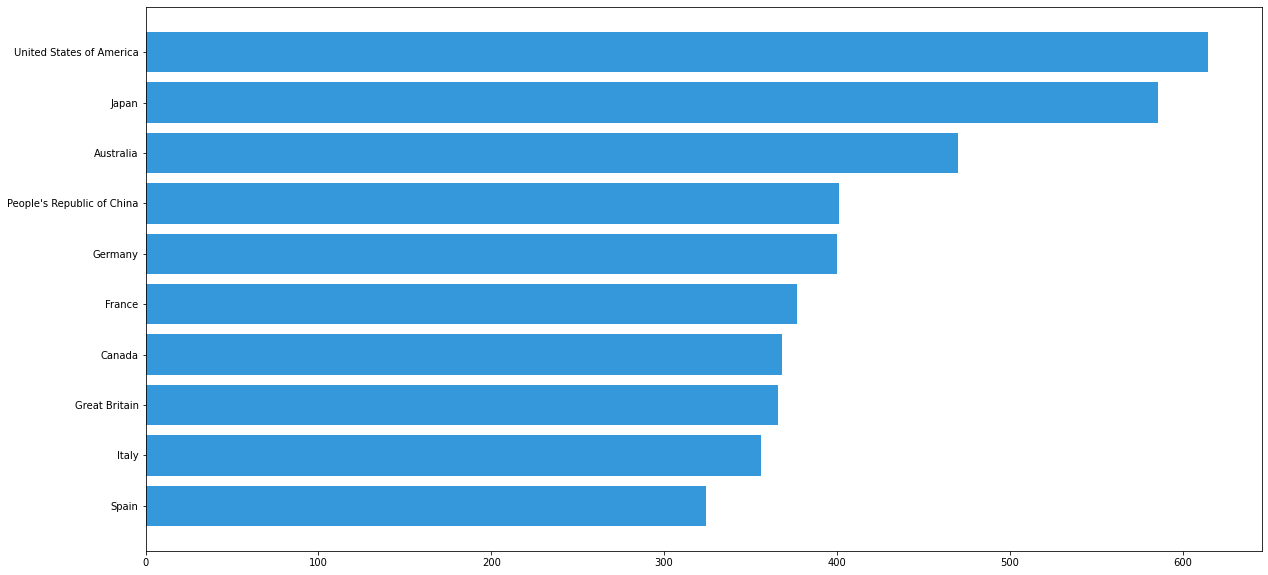

In [13]:
# Creating a figure with the specified size
figure= plt.subplots(figsize=(20, 10))
# Ploting the countries into a horizontal bar plot using the barh function by matplotlib
ax = plt.barh(countries.index, countries.values, color="#3498db")